# Graduate Admissions Prediction - using Machine Learning

BY: ANANTA (18CSU018)

We are requested to predict the chances of admission in graduate schools for students depending on their GRE and TOEFL scores. 
Hence we use the Machine Learning Algorithms to make our predictions.

0. INDEX


1. DATA DESCRIPTION


2. DATA CLEANING


3. DISCOVER AND VISUALIZE THE DATA TO GAIN INSIGHTS


4. FEATURE SELECTION


5. REGRESSION


    5.1. Comparing models using MSE

    5.2. Fine tuning of models

    5.3. Comparison using Mean and standard distribution


6. CLASSIFICATION


    6.1. Hyperparameter tuning
  
    6.2. Voting Classifier

    6.3. performance measure comparison


7. FINAL ANALYSIS

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# in order to ignore all the warnings and prevent confusion in the results and codes
import warnings
warnings.filterwarnings('ignore')

# 1. DATA DESCRIPTION

In [3]:
# Importing the dataset
data = pd.read_csv('Admission_Predict.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4.0,4.5,4.5,9.65,1,0.92
1,2,324,107,4.0,4.0,4.5,8.87,1,0.76
2,3,316,104,3.0,3.0,3.5,8.00,1,0.72
3,4,322,110,3.0,3.5,2.5,8.67,1,0.80
4,5,314,103,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    388 non-null float64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(5), int64(4)
memory usage: 28.2 KB


In [6]:
data.shape

(400, 9)

Our dataset contains 400 rows and 9 columns.

DATA DESCRIPTION

1. GRE Score - the GRE score is very important for any student seeking admission in Grad school for various programs and                      courses. A "good" GRE score depends on the the programs you are considering. This column contains the GRE scores of the respective student.


2. TOEFL Score - TOEFL is one of the most popular English proficiency exams accepted at American and Canadian universities and                  schools abroad. TOEFL tests the international students’ usage and understanding of English as it is spoken,                    written and heard in college and university surroundings.This column contains the TOEFL score for the student.


3. University Rating - This column contains the university rating by using different parameters into consideration.


4. SOP - contains the score for the Satatement of Purpose as required by the universities as the purpose for applying to particular courses.


5. LOR - contains the scores for the Letter of Recommendation which acts as a pivotal factor in your application. It helps the university admissions committee to evaluate you as a person – in terms of character, conduct, behavior and interpersonal skills.


6. CGPA - contains the CPGA score for the undergraduate school you have attended before.


7. Research - contains the values 0 and 1 depicting the student engaged in any research project or not .


8. Chances of Admit - contains the values for probability of the admission of student in the university based on all the scores involved.


In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,388.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.074742,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.139872,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
data["Research"].value_counts()

1    219
0    181
Name: Research, dtype: int64

219 students have participated in research activites while 181 have not.

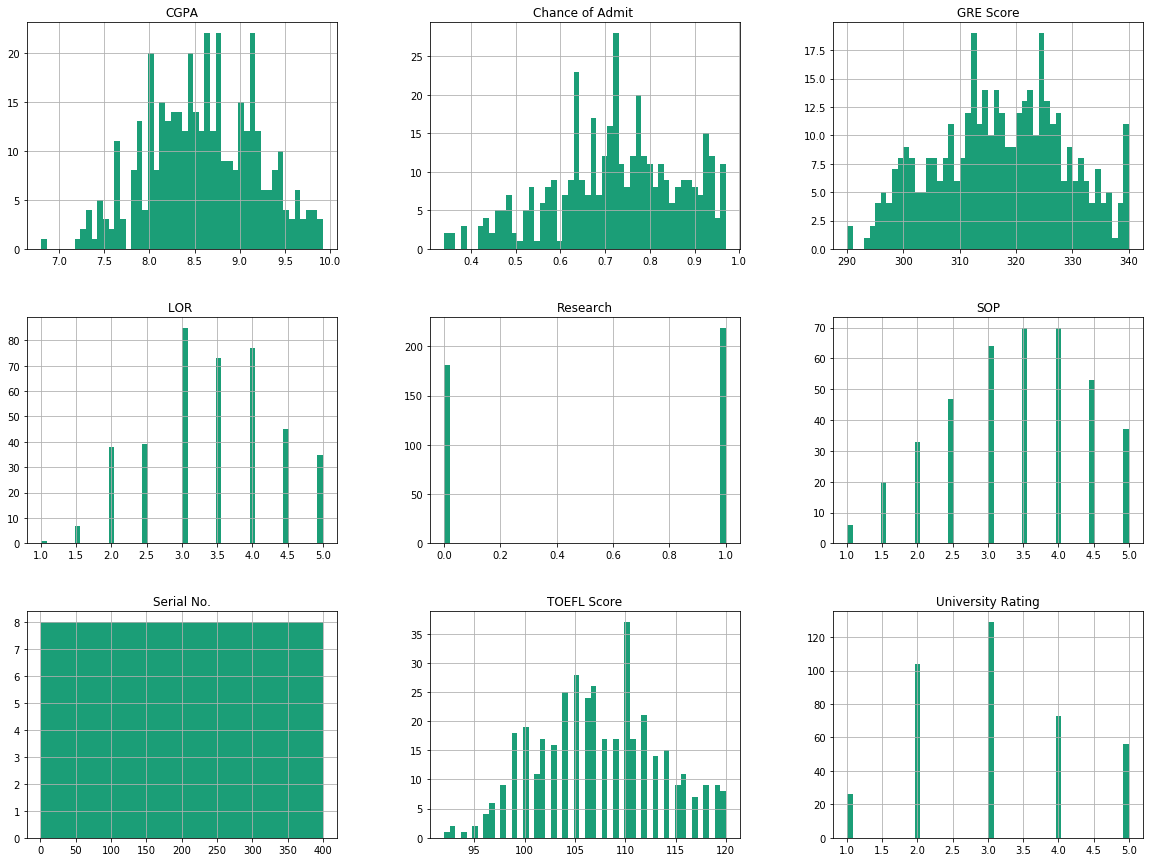

In [52]:
sns.set_palette("Dark2")

%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15));

These plots give us the frequency for each parameter value as in our dataset, to help analyse the dataset and the results better.

# 2. Data Cleaning

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

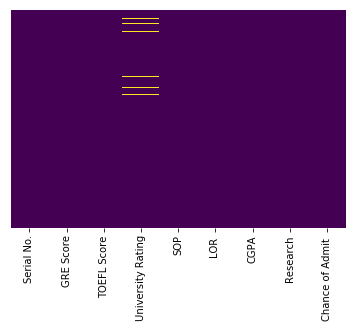

In [52]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The yellow lines in this heatmap represent the presence of missing values in our attribute 'University Rating'. since these are Discreet data values we have replaced them with the Median of the data column and obtain a dataset without any further missing values.

In [53]:
median=data.iloc[:, 3].median()
data.iloc[:, 3].fillna(median, inplace=True)

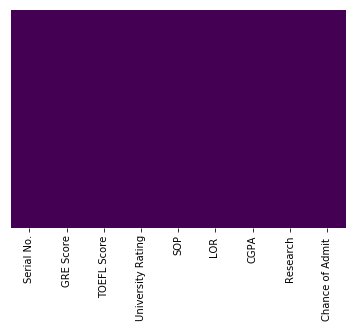

In [54]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

REMOVAL OF OUTLIERS

Outliers presence in our dataset can greatly effect the performance of our data if they are many in number. Hence, we have removed the outliers from my dataset which were lying outside the interquartile range of 1.5 times. After removal out of the previous 400 rows only 396 remain.

In [56]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(396, 9)


# 3. Discover and visualize the data to gain insights

Till now you have taken a quick glance at the data to get general understanding of the kind of data. The goal is to go in depth. Since it is a geographical data it is a good idea to create scatterplot of all districts to visualize the data

In [57]:
print(" GENERAL ANALYSIS OF DATA VALUES - \n")

print("Average GRE Score :          {0:.2f} out of 340".format(data['GRE Score'].mean()))
print('Average TOEFL Score:         {0:.2f} out of 120'.format(data['TOEFL Score'].mean()))
print('Average CGPA:                {0:.2f} out of 10'.format(data['CGPA'].mean()))
print('Average Chance of admission: {0:.2f}%'.format(data['Chance of Admit '].mean()*100))

 GENERAL ANALYSIS OF DATA VALUES - 

Average GRE Score :          316.99 out of 340
Average TOEFL Score:         107.52 out of 120
Average CGPA:                8.61 out of 10
Average Chance of admission: 72.80%


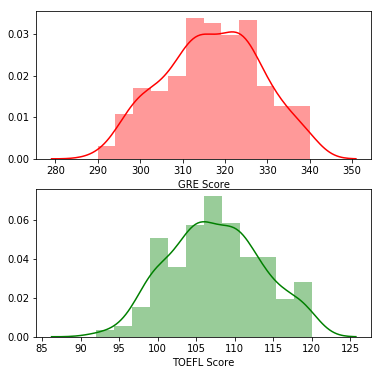

In [58]:
plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)
sns.distplot(data['GRE Score'],bins=12,color='Red');
plt.subplot(2, 1, 2)
sns.distplot(data['TOEFL Score'],bins=12,color='Green');

A distribution plot for GRE and TOEFL scores represents that more people tend to score between 310 - 325 in GRE and100 - 115 in TOEFL. It helps us to know the general trend of marks followed by Indian Students in these Exams.

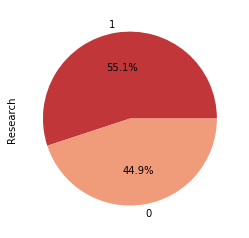

In [59]:
sns.set_palette("RdBu")
data['Research'].value_counts().plot.pie(autopct='%1.1f%%' )

The Pie chart explains the Research pattern of the students who have applied for graduate admissions. As observed the distribution of those who contributed in Research and those who didn't are almost around the getting 54.8% and 45.2% respectively.

Text(0, 0.5, 'GRE Score ')

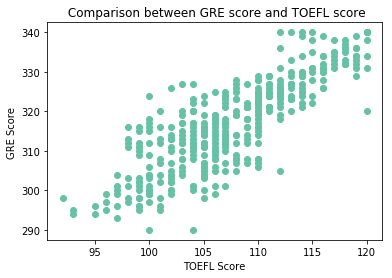

In [60]:
sns.set_palette("Set2")

plt.scatter(data["TOEFL Score"] , data["GRE Score"]);
plt.title(" Comparison between GRE score and TOEFL score")
plt.xlabel("TOEFL Score")
plt.ylabel("GRE Score " )

The Scatter plot depicts a strong correlation between GRE score and TOEFL score hence giving the analyses that the students who have scored better in GRE also tend to score well in TOEFL exam.

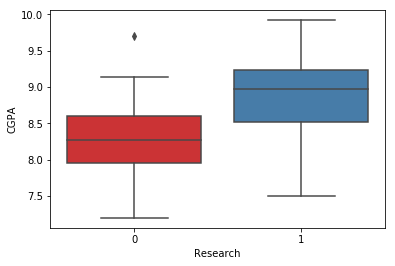

In [61]:
sns.set_palette("Set1")

sns.boxplot(x="Research", y="CGPA", data=data)

Box plot between Research and CGPA shows that the students who took up research were noticed to have higher CGPA values than those who did not do any research. The five point summary also denotes the presence of single outlier in both cases and depicting the median of CGPA being hogher in case of research students.

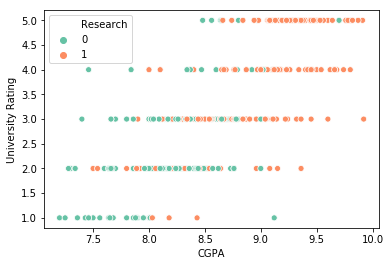

In [62]:
sns.set_palette("Set2")
sns.scatterplot(data["CGPA"] , data["University Rating"] , hue = data["Research"]);

The Scatter plot for CGPA and the University's ranking in which the students have applied shows that the students with higher CGPA, more than 8.5 have applied to the universities with a higher rating. As can be seen the universities with rating 4 and 5 have students with a CGPA greater than 8.5.

Also using the Hue as Research we see that the students with higher CGPA and those who applied to higher university ratings contain a majority of students have done Research while those who applied to universities with lower rating didn't do Research.

CORRELATION --

A correlation between variables indicates that as one variable changes in value, the other variable tends to change in a specific direction.  Understanding that relationship is useful because we can use the value of one variable to predict the value of the other variable. 

The term "correlation" refers to a mutual relationship or association between quantities. A correlation exists between the parameters if the correlation coefficient value is near 1 and does not exist if the value is around 0. It’s positive in case of values near +1 and negative for those near -1.

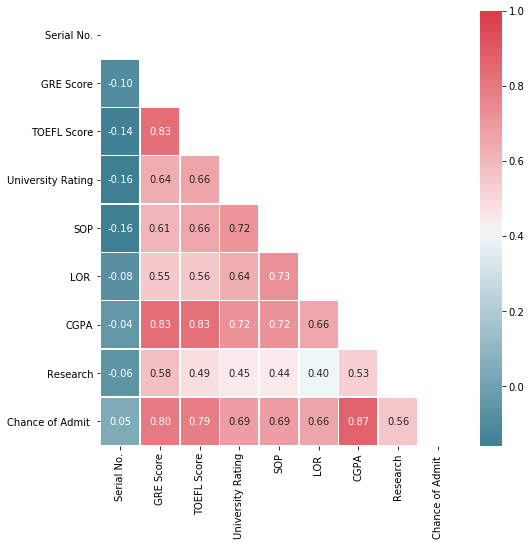

In [63]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

# 4. Feature Selection

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.
Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

In [48]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,[1,2,4,5,6,8]] # independent column
Y = data.iloc[:,7] # target column i.e. class


#apply selectkbest to select 6 features
bestfeatures = SelectKBest(score_func = chi2,k=6)
fit = bestfeatures.fit(X,Y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
#print the 6 best feature scores
print(featureScores.nlargest(6,'Score'))

              Specs      Score
0         GRE Score  55.849738
1       TOEFL Score  32.837957
2               SOP  23.456430
3              LOR   14.693549
4              CGPA   4.490025
5  Chance of Admit    3.428373


We see the 6 features being displayed corresponding to their scores as calculated by selectKbest and we get the top 5 features which are then used in our ML models.

# 5. Regression -  Machine Learning Algorithms

1. LINEAR REGRESSION

In [82]:
# we give the X and Y variables as the 
# cgpa and chance of admit
X = pd.DataFrame(data.iloc[:,6])
Y = pd.DataFrame(data.iloc[:,8])

# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.25)

In [83]:
# model making using the training dataset
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train , Y_train)

print('Coefficients\n',lin_regressor.coef_)

print('Intercept\n',lin_regressor.intercept_)

# predicting results using the test dataset
Y_pred = lin_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error , r2_score



Coefficients
 [[0.20955469]]
Intercept
 [-1.07660171]


For Linear Regression we have taken the parameters CGPA and Chance of Admit and using the CGPA values we are trying to predict the chances of admission for a student. we get the R2 score as 70% which is good enough for our model.

In [84]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(Y_test, Y_pred)
print(" Mean Squared error : ",lin_mse)
lin_rmse = np.sqrt(lin_mse)
print(" Root Mean Squared error : ",lin_rmse)
r2_lin = r2_score(Y_test,Y_pred)

# R2 score helps us to find the performance of our model
print("R2 score :{}".format(r2_score(Y_test,Y_pred)))

 Mean Squared error :  0.005308219713752314
 Root Mean Squared error :  0.07285753024741035
R2 score :0.7093196017060803


2. MULTIPLE LINEAR REGRESSION

In [96]:
X = pd.DataFrame(data.iloc[:,[1,2,4,5,6]])
Y = pd.DataFrame(data.iloc[:,8])

# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In case of Multiple Linear Regression we take the Independent variable as 'GRE Score, TOEFL Score, SOP, LOR and CGPA' while the Dependent variable contains the Chances of Admit. The test train split has a ratio of 75 : 25.

Checking the Assumptions for Regression =>

(a.) Multicolinearity

In [97]:
cr = data.corr()

For detecting Multicolinearity we see that the correlation between any 2 independent attributes must not be greater than 90% and this is checked by the heatmap as presented.

Herein no correlation value is greater than 90% hence we move ahead.

(b.) Linearity condition

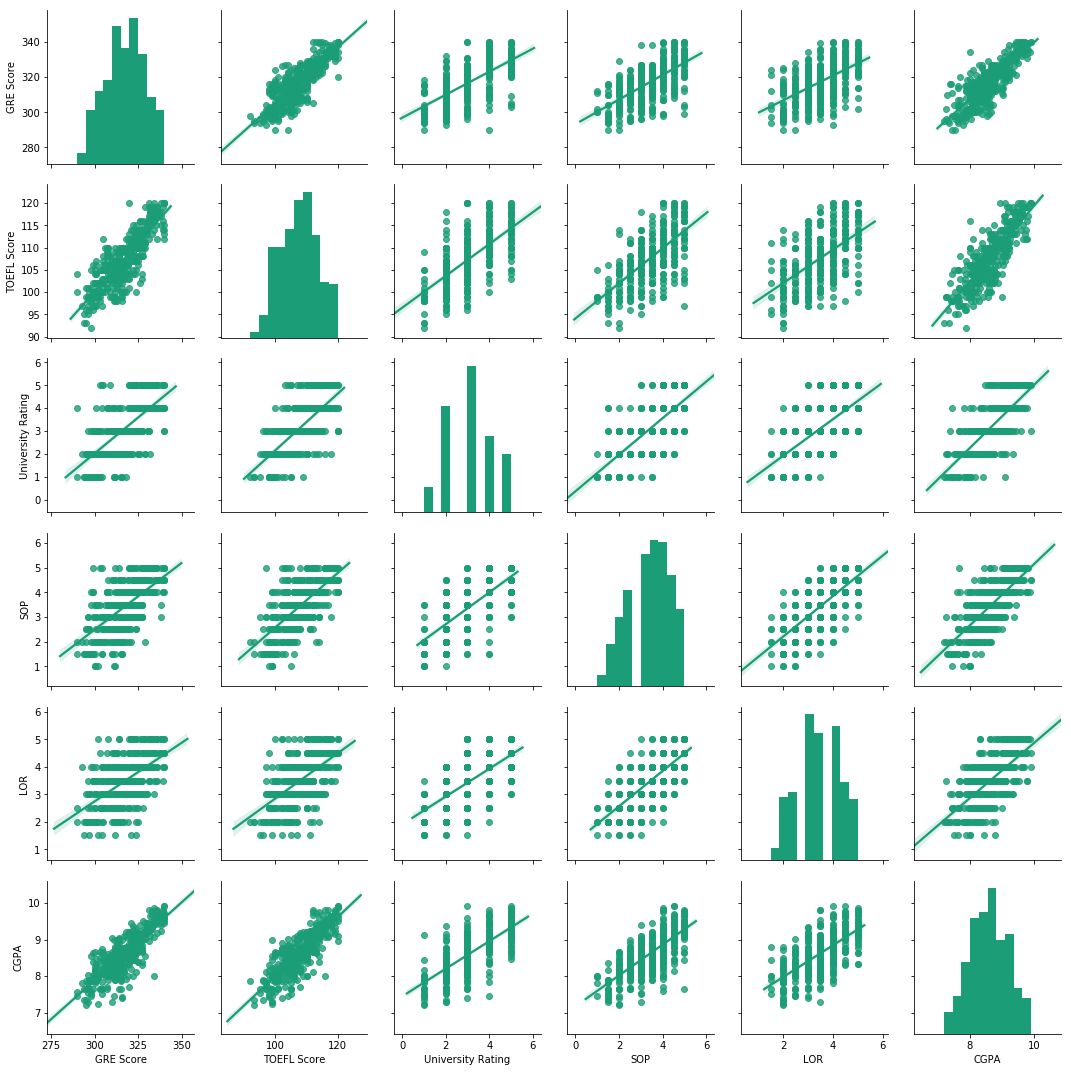

In [98]:
# Check for Linearity visually
sns.set_palette("Dark2")
linearity_assumption_plot_1 = sns.pairplot(pd.DataFrame(X), kind="reg")

Checking for linearity assumption (dataset should be large)
This assumption implies that there should be a linear relationship between the
response variable and the predictors.
The data can be explained by the linear equation y = c + m1x1 + m2x2 + ... + mkxk 

Checking the linearity assumption requires plotting of predictor 
versus response variables. This is fairly easy for simple linear
regression but in multiple linear regression with large number of predictor
variables, we can use standardised residual plot against each one of the
predictor variables. The ideal plot of residuals with each of the predictor
should be a random scatter because we assume that the residuals are 
uncorrelated with the predictor variables. Any noticeable pattern in such
plots indicates violation of linear relationship assumption.

(c.) Endogenity

In [99]:
linearity_test_df = pd.DataFrame(X_test)

endogenity_check = linearity_test_df.corr()
endogenity_check

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
GRE Score,1.000000,0.802337,0.683099,0.555580,0.487850,0.851893
TOEFL Score,0.802337,1.000000,0.658065,0.684036,0.572472,0.827694
University Rating,0.683099,0.658065,1.000000,0.706705,0.607297,0.771708
SOP,0.555580,0.684036,0.706705,1.000000,0.740192,0.716241
LOR,0.487850,0.572472,0.607297,0.740192,1.000000,0.608027
CGPA,0.851893,0.827694,0.771708,0.716241,0.608027,1.000000


Residuals should not be highly
coorelated with other predictors.The errors (difference between the observed and predicted values) is coorelated 
with our independent values.This is a problem referred to as omitted variable bias - when we forget to
include a relevant variable. Everything that we dont explain with our model goes into the error - so the 
error becomes coorelated with everything else

Herein we Create a dataframe of difference of observed and predicted and other 
variables and check correlation.

(d.) Homoscedasticity

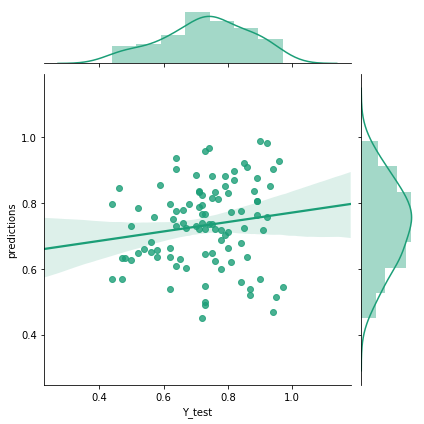

In [100]:
residual_test = np.column_stack([Y_test,Y_pred])
residual_test = pd.DataFrame(residual_test)
residual_test.columns='Y_test predictions'.split()
sns.jointplot(x='Y_test', y='predictions', data=residual_test, kind='reg')

Assumes the error terms have equal variance. 
An example of a dataset where errors have a different variance looks like a 
cone around the regression line.This means that with smaller values we get a better
prediction than with larger values. 

After checking our assumptions we find the R2 score and Mean square error for Multiple Linear Regression.

In [101]:
# model making using the training dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

print('Coefficients\n',regressor.coef_)

print('Intercept\n',regressor.intercept_)

# predicting results using the test dataset
Y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error , r2_score

# R2 score helps us to find the performance of our model
print("R2 score :{}".format(r2_score(Y_test,Y_pred)))
r2_mul = r2_score(Y_test,Y_pred)

Coefficients
 [[ 0.00262552  0.00252073  0.00570461 -0.00328187  0.02350706  0.11274448]]
Intercept
 [-1.43699901]
R2 score :0.8503367533918753


Here we have taken multiple independent variables which are GRE score , TOEFL score , SOP , LOR and CGPA to predict our model on the dependent variable Chances of Admit. As the number of explanatory variables has increased our model accuracy and R2 score have also shown an improvement leading to better predictions using the Multiple Linear Regression Model. 

In [102]:
from sklearn.metrics import mean_squared_error
mul_mse = mean_squared_error(Y_test, Y_pred)
print(" Mean Squared error : ",mul_mse)
mul_rmse = np.sqrt(mul_mse)
print(" Root Mean Squared error : ",mul_rmse)


 Mean Squared error :  0.0026095766827773596
 Root Mean Squared error :  0.051084015922569746


3. DECISION TREE REGRESSOR

In [103]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [104]:
Y_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(Y_test, Y_pred)
print(" Mean Squared error : ", tree_mse)

tree_rmse = np.sqrt(tree_mse)
print(" Root Mean Squared error : ", tree_rmse)

from sklearn.metrics import mean_squared_error , r2_score

# R2 score helps us to find the performance of our model
print("R2 score :{}".format(r2_score(Y_test,Y_pred)))
r2_tree = r2_score(Y_test,Y_pred)


 Mean Squared error :  0.00691010101010101
 Root Mean Squared error :  0.08312701732951214
R2 score :0.6036950520031785


Decision Tree Regressor has the function to measure the quality of a split. It supports mean square error which is equal to variance reduction as a feature selection criteria. we have used the decision tree regressor and calculated the R2 score as well as MSE for performance evaluation.

4. RANDOM FOREST REGRESSOR

In [105]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [106]:
Y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(Y_test, Y_pred)
print(" Mean Squared error : ", forest_mse)

forest_rmse = np.sqrt(forest_mse)
print(" Root Mean Squared error : ", forest_rmse)

from sklearn.metrics import mean_squared_error , r2_score

# R2 score helps us to find the performance of our model
print("R2 score :{}".format(r2_score(Y_test,Y_pred)))
r2_forest = r2_score(Y_test,Y_pred)


 Mean Squared error :  0.0036036565656565643
 Root Mean Squared error :  0.06003046364685654
R2 score :0.7933247392819149


A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap = True (default).

5. SUPPORT VECTOR MACHINE

In [107]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, Y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
Y_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(Y_test, Y_pred)
print(" Mean Squared error : ", svm_mse)

svm_rmse = np.sqrt(svm_mse)
print("Root Mean Squared error : ", svm_rmse)

from sklearn.metrics import mean_squared_error , r2_score

# R2 score helps us to find the performance of our model
print("R2 score :{}".format(r2_score(Y_test,Y_pred)))
r2_svm = r2_score(Y_test,Y_pred)

 Mean Squared error :  0.0035105533849239196
Root Mean Squared error :  0.05924992307947682
R2 score :0.798664350257884


In simple regression we try to minimise the error rate. While in SVR we try to fit the error within a certain threshold. It is a powerful algorithm which allows us to choose how tolerant we are of the errors.

# 5.1. Comparing our models using MSE

In [109]:
models = ["Simple Linear Regression" , "Multiple Linear Regression" , "Decision Tree Regressor" , "Random Forest Regressor" , "Support Vector Regression"]
values = [lin_mse, mul_mse, tree_mse , forest_mse , svm_mse]
r2 = [r2_lin, r2_mul, r2_tree, r2_forest, r2_svm]


# creating a dictionary
dict = {'Models': models , 'Mean Square Error': values , "R2 Score" : r2}

df = pd.DataFrame(dict)
df

,Models,Mean Square Error,R2 Score
0,Simple Linear Regression,0.005308,0.709320
1,Multiple Linear Regression,0.002610,0.850337
2,Decision Tree Regressor,0.006910,0.603695
3,Random Forest Regressor,0.003604,0.793325
4,Support Vector Regression,0.003511,0.798664


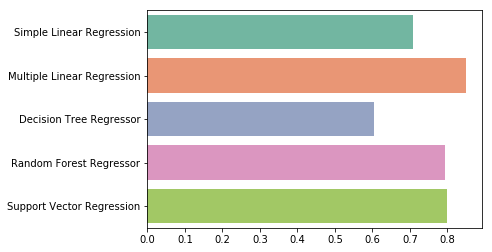

In [110]:
sns.set_palette("Set2")
sns.barplot(x=r2, y=models)

We notice that the value of mean square error is the least in case of Multiple Linear Regression and hence we consider it to be the best model for our Dataset. While the Decision Tree Regressor has the least value making it the worst performer for our model.

# 5.2. Fine tuning our model

Hence using Cross Validation to improve the performance measures !!

In [121]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [122]:
from sklearn.model_selection import cross_val_score

LINEAR REGRESSION

In [123]:
X = pd.DataFrame(data.iloc[:,6])
Y = pd.DataFrame(data.iloc[:,8])

# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.25)

In [124]:
lin_scores = cross_val_score(lin_regressor, X_train, Y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_mean = -lin_scores.mean()
lin_std = lin_scores.std()
display_scores(lin_rmse_scores)

Scores: [0.0709675  0.05356484 0.06423402 0.0624475  0.07269409 0.07835461
 0.04537068 0.05151888 0.06644562 0.08549111]
Mean: 0.0651088854849138
Standard deviation: 0.011831854944082764


MULTIPLE REGRESSION

In [125]:
X = pd.DataFrame(data.iloc[:,[1,2,3,4,5,6]])
Y = pd.DataFrame(data.iloc[:,8])

# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In [126]:
mul_scores = cross_val_score(regressor, X_train, Y_train,
                             scoring="neg_mean_squared_error", cv=10)
mul_rmse_scores = np.sqrt(-mul_scores)
mul_mean = -mul_scores.mean()
mul_std = mul_scores.std()
display_scores(mul_rmse_scores)

Scores: [0.07453175 0.07392249 0.06543676 0.05300464 0.05824797 0.06121644
 0.07025533 0.04383791 0.06037942 0.04824606]
Mean: 0.06090787770161615
Standard deviation: 0.009922154790153275


DECISION TREE

In [127]:
tree_scores = cross_val_score(tree_reg, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_mean = -tree_scores.mean()
tree_std = tree_scores.std()
display_scores(tree_rmse_scores)

Scores: [0.09523655 0.08154753 0.08650626 0.08154753 0.07241086 0.08721621
 0.09941496 0.08739526 0.0935875  0.05833908]
Mean: 0.08432017407289248
Standard deviation: 0.011347903373917907


RANDOM FOREST 

In [128]:
forest_scores = cross_val_score(forest_reg, X_train, Y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_mean = -forest_scores.mean()
forest_std = forest_scores.std()
display_scores(forest_rmse_scores)

Scores: [0.07787683 0.07773481 0.07412849 0.06621178 0.07096548 0.07561944
 0.07448132 0.05700302 0.07701993 0.0484049 ]
Mean: 0.0699446000894123
Standard deviation: 0.009435981449663351


SUPPORT VECTOR MACHINE

In [129]:
svm_scores = cross_val_score(svm_reg, X_train, Y_train,
                                scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
svm_mean = -svm_scores.mean()
svm_std = svm_scores.std()
display_scores(svm_rmse_scores)

Scores: [0.0769057  0.0728043  0.06587559 0.05819697 0.0727025  0.06549808
 0.07254436 0.05493516 0.07023756 0.05572678]
Mean: 0.066542698564281
Standard deviation: 0.007464053965585952


# 5.3. Comparing our Fine Tuned models using Mean & Standard Deviation

In [130]:
models = ["Simple Linear Regression" , "Multiple Linear Regression" , "Decision Tree Regressor" , "Random Forest Regressor" , "Support Vector Regression"]
mean = [lin_mean, mul_mean, tree_mean , forest_mean , svm_mean]
std = [lin_std, mul_std, tree_std , forest_std , svm_std]

# creating a dictionary
dict = {'Models': models , 'Mean': mean , 'Standard Deviation': std }

df = pd.DataFrame(dict)
df

,Models,Mean,Standard Deviation
0,Simple Linear Regression,0.004379,0.001545
1,Multiple Linear Regression,0.003808,0.001193
2,Decision Tree Regressor,0.007239,0.001800
3,Random Forest Regressor,0.004981,0.001210
4,Support Vector Regression,0.004484,0.000973


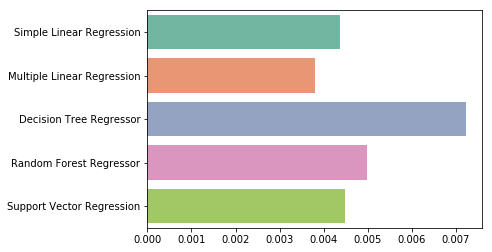

In [131]:
sns.set_palette("Set2")
sns.barplot(x= mean, y= models)

We see that after crossvalidation the Decision Tree Regressor has given us the maximum value for mean while Multiple linear regression has the least value for mean as calculated after the use of Cross Validation on out models.

# 6.  CLASSIFICATION 

We also study the classification techniques on our dataset with the independent variable handling ' GRE Score, TOEFL Score, SOP, LOR and CGPA' and dependent variable is given the class label Research containing values for whether Research can be performed or not.

The performance Measures we have found are CONFUSION MATRIX, F1 SCORE, ACCURACY SCORE and AREA UNDER CURVE value.

In [132]:
X = pd.DataFrame(data.iloc[:,[1,2,4,5,6]])
Y = pd.DataFrame(data.iloc[:,7])

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=42)

The various Performance Measures as calculated by us include the Classification Matrix, F1 score, Accuracy with/without Cross validation and Area under the curve.

1. LOGISTIC REGRESSION

In [134]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 
train_pred=classifier.predict(X_train)

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. It uses a logit function to convert the calculations of the model as done into the classes to be predicted as 0 or 1 based upon the threshold mentioned.

Herein we have used it to predict whether Research was done or Not by the Student !

In [135]:
# finding the Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[19 16]
 [14 31]]


In [136]:
# the classification Report containing F1 score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        35
           1       0.66      0.69      0.67        45

   micro avg       0.62      0.62      0.62        80
   macro avg       0.62      0.62      0.62        80
weighted avg       0.62      0.62      0.62        80



In [137]:
# Accuracy Score after Crossvalidation
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
acc_log = results.mean()
print("Accuracy for Logistic Regression after cross validation is  : " , acc_log)

Accuracy for Logistic Regression after cross validation is  :  0.6769230769230768


In [139]:
# the Accuracy of the Model without cross validation
from sklearn.metrics import accuracy_score
acc1_log = accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic Regression is : ",acc1_log)

Accuracy Score for Logistic Regression is :  0.625


We notice that after cross validation the accuracy score has increased by 0.021 units.

In [142]:
# Area Under the Curve performance measure After cross Validation
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
auc_log = results.mean()
print("Area under the curve score is : ",auc_log)

Area under the curve score is :  0.7560443961117141


2. NAIVE BAYES

In [143]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models.

In [144]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[26  9]
 [13 32]]


In [145]:
# the classification Report containing F1 score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        35
           1       0.78      0.71      0.74        45

   micro avg       0.72      0.72      0.73        80
   macro avg       0.72      0.73      0.72        80
weighted avg       0.73      0.72      0.73        80



In [147]:
# Accuracy Score after Crossvalidation
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

scoring = 'accuracy'
results = model_selection.cross_val_score(classifier, X, Y, cv=kfold, scoring=scoring)
acc_nb = results.mean()
print("Accuracy after cross validation :", acc_nb)

Accuracy after cross validation : 0.7606410256410256


In [148]:
# the Accuracy of the Model without cross validation
acc1_nb = accuracy_score(y_test, y_pred)
print("Accuracy score for naive bayes: ",acc1_nb)

Accuracy scire for naive bayes:  0.725


In [149]:
# Area Under the Curve performance measure After cross Validation
scoring = 'roc_auc'
results = model_selection.cross_val_score(classifier, X, Y, cv=kfold, scoring=scoring)
auc_nb = results.mean()
print("Area under the curve score : ",auc_nb)

Area under the curve score :  0.8434640230226454


3. SUPPORT VECTOR MACHINE

In [150]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. 

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In [151]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[28  7]
 [10 35]]


In [152]:
# the classification Report containing F1 score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.83      0.78      0.80        45

   micro avg       0.79      0.79      0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [159]:
# Accuracy Score after Crossvalidation
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

scoring = 'accuracy'
results = model_selection.cross_val_score(classifier, X, Y, cv=kfold, scoring=scoring)
acc_svm = results.mean()
print("Accuracy after cross validation:" , acc_svm)

Accuracy after cross validation: 0.7782051282051283


In [160]:
# the Accuracy of the Model without cross validation
acc1_svm = accuracy_score(y_test, y_pred)
print("SVM accuracy :", acc1_svm)

SVM accuracy : 0.7875


we see that in the case of SVM the accuracy after cross validation is less than the total accuracy score.

In [155]:
# Area Under the Curve performance measure After cross Validation
scoring = 'roc_auc'
results = model_selection.cross_val_score(classifier, X, Y, cv=kfold, scoring=scoring)
auc_svm = results.mean()
print("Area under the curve score:", auc_svm)

Area under the curve score: 0.8214726272772822


# 6.1. Hypertuning parameter

In [157]:
# use of Random search ---
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

rnd = RandomizedSearchCV(SVC(),param_grid,refit=True,verbose=2)
rnd.fit(X_train,y_train)
rnd_predictions = rnd.predict(X_test)

print("\n\n")
acc_score = accuracy_score(y_test, rnd_predictions)
print( "Random Search Accuracy Score on SVM : " , acc_score)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] gamma=1, C=0.1 ..................................................
[CV] ................................... gamma=1, C=0.1, total=   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ................................... gamma=1, C=0.1, total=   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ................................... gamma=1, C=0.1, total=   0.0s
[CV] gamma=0.001, C=10 ...............................................
[CV] ................................ gamma=0.001, C=10, total=   0.0s
[CV] gamma=0.001, C=10 ...............................................
[CV] ................................ gamma=0.001, C=10, total=   0.0s
[CV] gamma=0.001, C=10 ...............................................
[CV] ................................ gamma=0.001, C=10, total=   0.0s
[CV] gamma=0.1, C=100 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ gamma=0.01, C=100, total=   0.0s



Random Search Accuracy Score on SVM :  0.775


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. 

We use Random Search as it is expected to work better than the Grid Search algorithm in case of many features being present as in our dataset. herein we have used Random Search on SVM and found the accuracy in order to compare the performance of Randomised hyperparameters and normal parameters.

4. DECISION TREE

In [161]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Decision tree classifiers are used successfully in many diverse areas. Their most important feature is the capability of capturing descriptive decisionmaking knowledge from the supplied data.

In [162]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[28  7]
 [17 28]]


In [163]:
# the classification Report containing F1 score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        35
           1       0.80      0.62      0.70        45

   micro avg       0.70      0.70      0.70        80
   macro avg       0.71      0.71      0.70        80
weighted avg       0.72      0.70      0.70        80



In [165]:
# Accuracy Score after Crossvalidation
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

scoring = 'accuracy'
results = model_selection.cross_val_score(classifier, X, Y, cv=kfold, scoring=scoring)
acc_tree = results.mean()
print("Accuracy after cross validation : ",acc_tree)

Accuracy after cross validation :  0.687371794871795


In [166]:
# the Accuracy of the Model without cross validation
acc1_tree = accuracy_score(y_test, y_pred)
print("Accuracy score : ",acc1_tree)

Accuracy score :  0.7


In [168]:
# Area Under the Curve performance measure After cross Validation
scoring = 'roc_auc'
results = model_selection.cross_val_score(classifier, X, Y, cv=kfold, scoring=scoring)
auc_tree = results.mean()
print("Area under the curve : ", auc_tree)

Area under the curve :  0.6651849376842478


# 6.2.  VOTING CLASSIFIER

Voting Classifier is an Ensemble Method which helps us to find the model performance when 2 or more classifiers are used together to perform better on our model.

Herein we have used Logistic Regression and Decision tree as these two are the worst indivisual performers on the basis of their Accuracy scores.

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier(criterion = 'entropy')
svm_clf = SVC()

voting_clf = VotingClassifier(
	estimators = [('lr', log_clf), ('tree', tree_clf), ('svc',svm_clf)],
	voting = 'hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('tree', Decisi...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [172]:
# Accuracy of the model with Cross Validation
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

scoring = 'accuracy'
results = model_selection.cross_val_score(voting_clf, X, Y, cv=kfold, scoring=scoring)
acc_vot = results.mean()
print(" Accuracy with cross validation", acc_vot)

 Accuracy with cross validation 0.7553846153846154


In [173]:
# the Accuracy of the Model without cross validation
acc1_vot = accuracy_score(y_test, y_pred)
print("Accuracy Score without cross validation",acc1_vot)

Accuracy Score without cross validation 0.7


In [174]:
auc_vot = 'nan'

# 6.3. Comparing the Classifier Performance

In [175]:
models = ["Logistic Regression" , "Naive Bayes" , "Support Vector Machine", "Decision Tree", "Voting Classifier"]
accuracycv = [acc_log, acc_nb, acc_svm, acc_tree, acc_vot]
accuracy = [acc1_log, acc1_nb, acc1_svm, acc1_tree, acc1_vot]

auc = [auc_log, auc_nb, auc_svm, auc_tree, auc_vot]

# creating a dictionary
dict = {'Models': models , 'Accuracy with cross-validation': accuracycv , 'Accuracy score': accuracy, 'Area Under Curve': auc }

df = pd.DataFrame(dict)
df

,Models,Accuracy with cross-validation,Accuracy score,Area Under Curve
0,Logistic Regression,0.676923,0.6250,0.756044
1,Naive Bayes,0.760641,0.7250,0.843464
2,Support Vector Machine,0.778205,0.7875,0.821473
3,Decision Tree,0.687372,0.7000,0.665185
4,Voting Classifier,0.755385,0.7000,nan


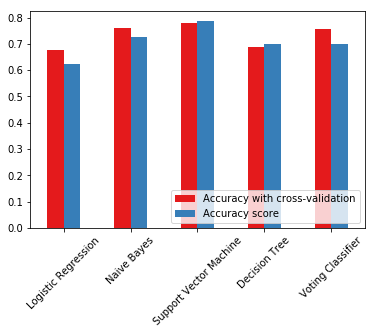

In [177]:
sns.set_palette("Set1")

df = pd.DataFrame({'Accuracy with cross-validation': accuracycv , 'Accuracy score': accuracy} , index = models)
ax = df.plot.bar(rot=45, legend=True);
ax.legend( loc="lower right")
# rot gives us the rotation of the index

We see that SVM performs the best on our dataset with both the accuracy scores almost equal to each other, on the other hand Logistic regression is the worst performer !

# 7. final analysis

                               Regression Technique => ~ MULTIPLE LINEAR REGRESSION ~

                               Classification Technique => ~ SUPPORT VECTOR MACHINE ~

# THANK YOU